In [24]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scripts.read_land_use_no_gdal as rlu
import scripts.read_image_data_scaleable as rid
import datetime
import shelve
from collections import Counter

In [25]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data_scaleable' from '../scripts/read_image_data_scaleable.py'>

In [26]:
image_dir='../large_area/2014/images/'
mask_dir='../large_area/2014/masks/'
table_dir='../large_area/2014/tables/LC8_SR.csv'
new_table_dir='../large_area/2015/tables/LC8_SR.csv'
shelve_root_dir='../models/large_area/shelves/'
processes=12
max_days_apart=30
step=250000

In [55]:
imgs = shelve.open(shelve_root_dir + 'old/interpolated')

In [56]:
def open_img(img_id, img_dir, res):
    return np.memmap(img_dir + img_id, dtype='int16', mode='r', shape=res)

In [57]:
first_ts, first_res = list(imgs.items())[25]

In [58]:
img0 = open_img(first_ts, shelve_root_dir + 'old/maps_interpolated/', first_res)

In [59]:
img0.shape

(3, 5999, 8562)

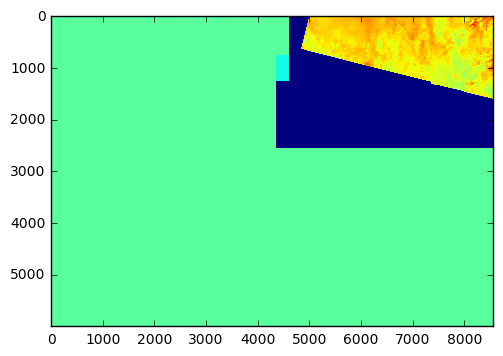

In [60]:
plt.imshow(img0[0, :, :])

In [22]:
cnt = Counter(img0[3, :, :].flatten())

In [23]:
print(cnt.most_common(5))

[(0, 42114117), (255, 6381217), (4, 2412118), (2, 455351), (1, 635)]
